<a href="https://colab.research.google.com/github/loudenmotina/datascience_project_louden/blob/main/regression_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df.isnull().values.sum()

0

In [7]:
df=df.drop(['id','date'],axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
corr=df.corr()
corr['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [9]:
target=df.iloc[:,0]
features=df.iloc[:1:]
target

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [10]:
corr=df.corr()
corr['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [11]:
#remove /display corr values <0.2
target_corr=abs(corr['price'])
remove_features=target_corr[target_corr<0.2]
remove_features


sqft_lot        0.089661
condition       0.036362
yr_built        0.054012
yr_renovated    0.126434
zipcode         0.053203
long            0.021626
sqft_lot15      0.082447
Name: price, dtype: float64

In [12]:
df1=df.drop(['sqft_lot','condition','yr_built','yr_renovated','zipcode','long','sqft_lot15'],axis=1)
df1

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


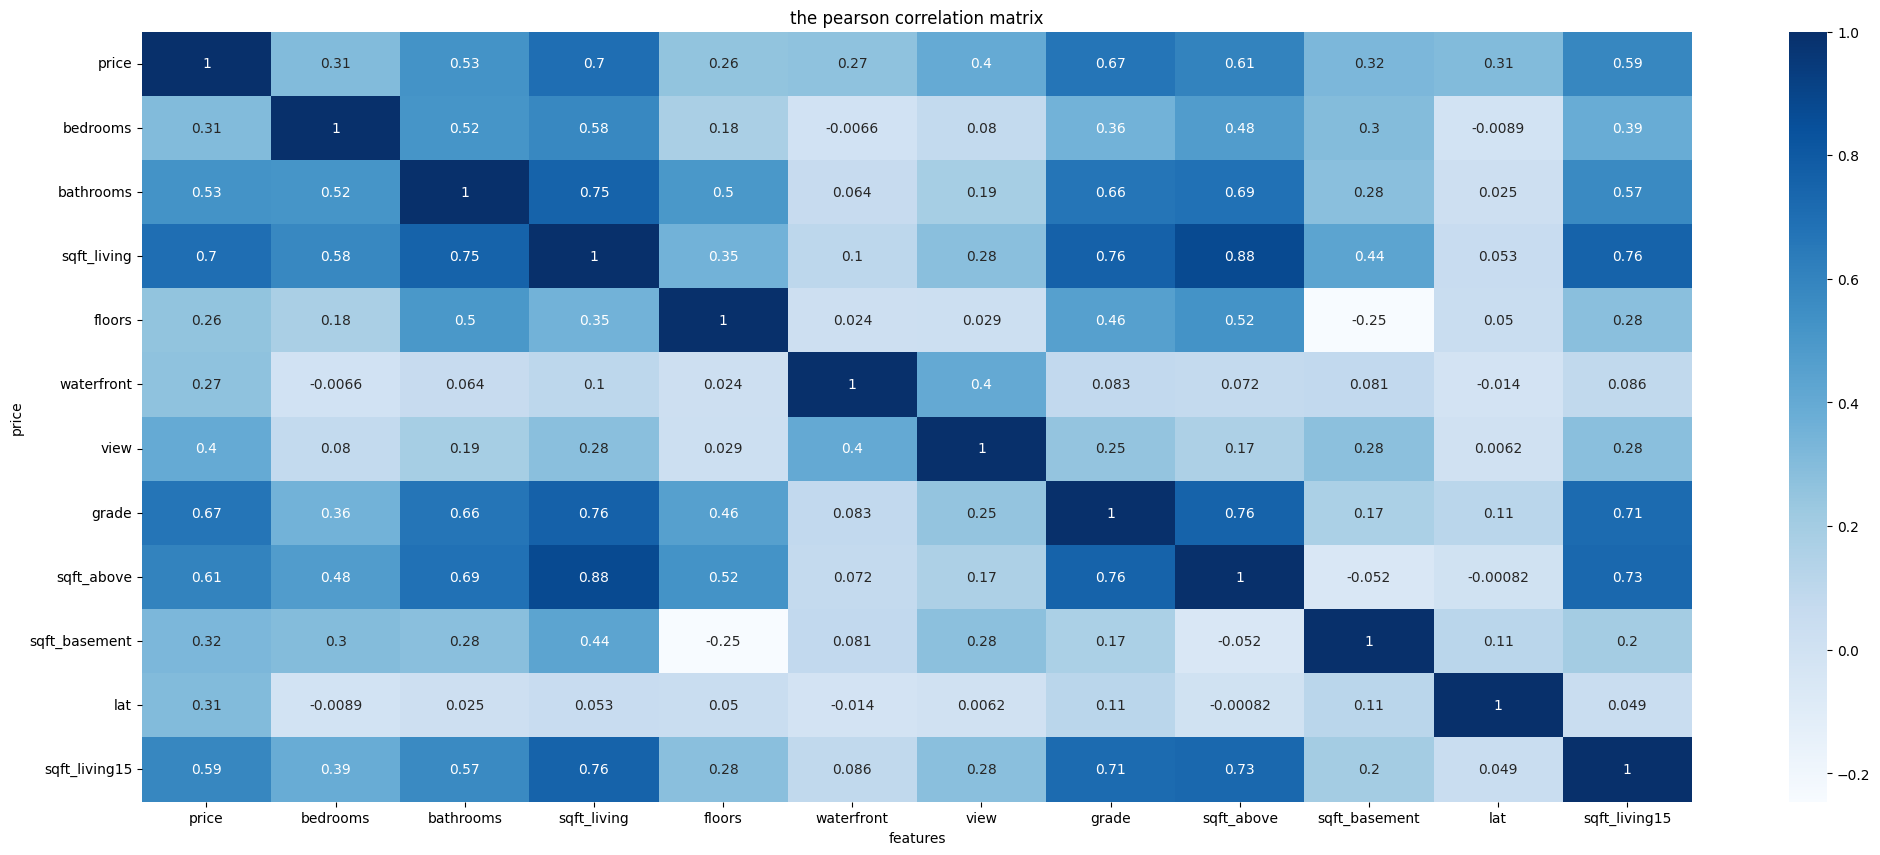

In [13]:
#plot pearson correlation matrix
fig=plt.figure(figsize=(25,10))
new_corr=df1.corr()
sns.heatmap(new_corr, annot=True, cmap='Blues', annot_kws={'size':10})
plt.ylabel('price')
plt.xlabel('features')
plt.title('the pearson correlation matrix')
plt.show()



In [14]:
high_corr_features=new_corr[new_corr>0.75].fillna('.')
high_corr_features

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.0,.,.,.,.,.,.,.,.,.,.,.
bedrooms,.,1.0,.,.,.,.,.,.,.,.,.,.
bathrooms,.,.,1.0,0.754665,.,.,.,.,.,.,.,.
sqft_living,.,.,0.754665,1.0,.,.,.,0.762704,0.876597,.,.,0.75642
floors,.,.,.,.,1.0,.,.,.,.,.,.,.
waterfront,.,.,.,.,.,1.0,.,.,.,.,.,.
view,.,.,.,.,.,.,1.0,.,.,.,.,.
grade,.,.,.,0.762704,.,.,.,1.0,0.755923,.,.,.
sqft_above,.,.,.,0.876597,.,.,.,0.755923,1.0,.,.,.
sqft_basement,.,.,.,.,.,.,.,.,.,1.0,.,.


In [15]:
df2=df1.drop(['sqft_above','sqft_living15'],axis=1)
df2

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,221900.0,3,1.00,1180,1.0,0,0,7,0,47.5112
1,538000.0,3,2.25,2570,2.0,0,0,7,400,47.7210
2,180000.0,2,1.00,770,1.0,0,0,6,0,47.7379
3,604000.0,4,3.00,1960,1.0,0,0,7,910,47.5208
4,510000.0,3,2.00,1680,1.0,0,0,8,0,47.6168
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,0,47.6993
21609,400000.0,4,2.50,2310,2.0,0,0,8,0,47.5107
21610,402101.0,2,0.75,1020,2.0,0,0,7,0,47.5944
21611,400000.0,3,2.50,1600,2.0,0,0,8,0,47.5345


In [16]:
x=df2.drop('price',axis=1)
y=df2['price']
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=101)
lr_reg=LinearRegression()
lr_reg.fit(x_train,y_train)
lr_pred=lr_reg.predict(x_test)
lr_pred2=lr_reg.predict(x_train)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
lr_mse= mean_squared_error(y_test,lr_pred)
lr_mae=mean_absolute_error(y_test,lr_pred)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_train, lr_pred2, force_finite=False)

0.6505668457422706

In [19]:
r2_score(y_test, lr_pred, force_finite=False)

0.6701007519992479

**KNN_MODEL**

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
x=df2.drop('price',axis=1)
y=df2['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
knn_reg=KNeighborsRegressor(n_neighbors= 5)

In [23]:
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

In [24]:
knn_pred=knn_reg.predict(x_test)
knn_pred2=knn_reg.predict(x_train)
knn_mse=mean_squared_error(y_test,knn_pred)
knn_mse=mean_squared_error(y_train,knn_pred2)
r2_score(y_test,knn_pred,force_finite=False)

0.5032434346430801

In [25]:

r2_score(y_train,knn_pred2,force_finite=False)

0.6976637242320884

*svm regressor

In [26]:
from sklearn.svm import SVR
x=df2.drop('price',axis=1)
y=df2['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
svr_reg=SVR()
svr_reg.fit(x_train,y_train)
svr_pred=svr_reg.predict(x_test)
svr_pred2=svr_reg.predict(x_train)
svr_mse=mean_squared_error(y_test,svr_pred)
r2_score(y_test,svr_pred,force_finite=False)
#r2_score(y_train,svr_pred2,force_finite=False)


-0.05919971511487754

Decision tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
x=df2.drop('price',axis=1)
y=df2['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
dt_pred=dt_reg.predict(x_test)
dt_pred2=dt_reg.predict(x_train)
dt_mse=mean_squared_error(y_test,dt_pred)
r2_score(y_test,dt_pred,force_finite=False)
r2_score(y_train,dt_pred2,force_finite=False)

0.9993378223747604

In [28]:
dt_mse

59944158734.850716

In [29]:
r2_score(y_test,dt_pred,force_finite=False)

0.5847780086414145

random_forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
x=df2.drop('price',axis=1)
y=df2['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)
rf_pred=rf_reg.predict(x_test)
rf_pred2=rf_reg.predict(x_train)
rf_mse=mean_squared_error(y_test,rf_pred)
r2_score(y_test,rf_pred,force_finite=False)

0.781855087473616

In [31]:
r2_score(y_train,rf_pred2,force_finite=False)

0.97311522146219

All models combined

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [38]:
x=df2.drop('price',axis=1)
y=df2['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
lr_reg= LinearRegression()
rf_reg=RandomForestRegressor(n_estimators=100)
knn_reg=KNeighborsRegressor(n_neighbors=5)
svr_reg=SVR()
dt_reg=DecisionTreeRegressor()
xgb_reg = GradientBoostingRegressor(n_estimators=300, learning_rate=0.3, max_depth=10, random_state=0)

In [39]:
lr_reg.fit(x_train,y_train)
rf_reg.fit(x_train,y_train)
knn_reg.fit(x_train,y_train)
svr_reg.fit(x_train,y_train)
dt_reg.fit(x_train,y_train)
xgb_reg.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=10, n_estimators=300,
                          random_state=0)

In [40]:
# Make predictions
svr_pred=svr_reg.predict(x_test)
knn_pred = knn_reg.predict(x_test)
dt_pred = dt_reg.predict(x_test)
rf_pred = rf_reg.predict(x_test)
xgb_pred = xgb_reg.predict(x_test)
lr_pred=lr_reg.predict(x_test)

In [42]:
lr_mse= mean_squared_error(y_test,lr_pred)
rf_mse=mean_squared_error(y_test,rf_pred)
knn_mse=mean_squared_error(y_test,knn_pred)
svr_mse=mean_squared_error(y_test,svr_pred)
dt_mse=mean_squared_error(y_test,dt_pred)
xgb_mse=mean_squared_error(y_test,xgb_pred)

plotting bar chat

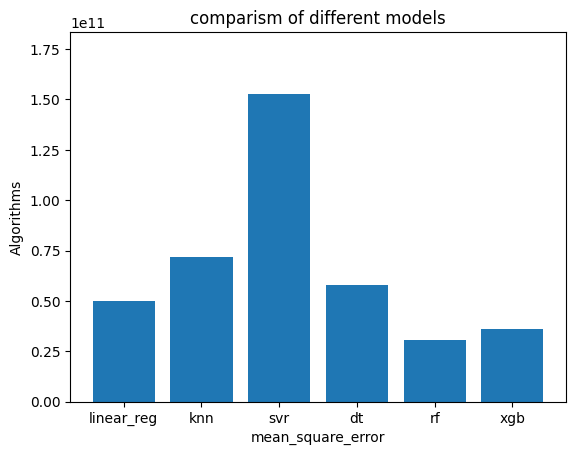

In [53]:
import matplotlib.pyplot as plt
x=('linear_reg','knn','svr','dt','rf','xgb')
y=(lr_mse,knn_mse,svr_mse,dt_mse,rf_mse,xgb_mse)
plt.bar(x,y)
plt.xlabel('mean_square_error')
plt.ylabel('Algorithms')
plt.title('comparism of different models')
plt.ylim(0, max(y) * 1.2)  # Set y-axis limits for better visualization
plt.show()

In [54]:
lr_r2 =r2_score(y_test,lr_pred)
knn_r2=r2_score(y_test,knn_pred)
svr_r2=r2_score(y_test,svr_pred)
dt_r2=r2_score(y_test,dt_pred)
rf_r2=r2_score(y_test,rf_pred)
xgb_r2=r2_score(y_test,xgb_pred)


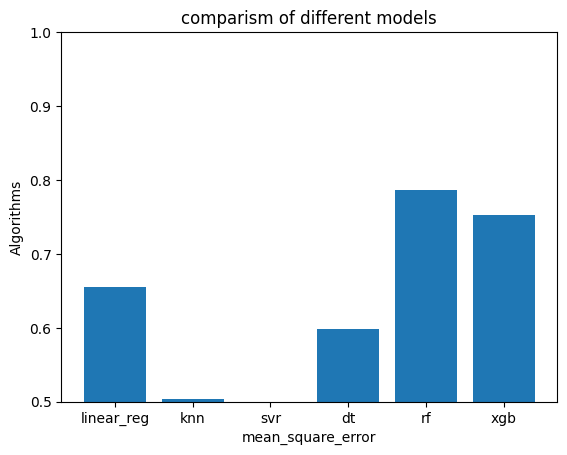

In [58]:
import matplotlib.pyplot as plt
x=('linear_reg','knn','svr','dt','rf','xgb')
y=(lr_r2,knn_r2,svr_r2,dt_r2,rf_r2,xgb_r2)
plt.bar(x,y)
plt.xlabel('mean_square_error')
plt.ylabel('Algorithms')
plt.title('comparism of different models')
plt.ylim(0.5, 1.0)  # Set y-axis limits for better visualization
plt.show()